In [1]:
import pickle
import numpy as np

In [2]:
datasets = [
    {'name': 'fb_forum', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'},
    {'name': 'ia_contact', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'},
    {'name': 'ia_contacts_hypertext_2009', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'},
    {'name': 'ia_email_eu', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'},
    {'name': 'ia_enron_employees', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'},
    {'name': 'ia_radoslaw_email', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'},
    {'name': 'soc_sign_bitcoin_alpha', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'},
    {'name': 'wiki_elections', 'context_window_size': 10, 'init_picker': 'Exponential', 'edge_picker': 'Uniform', 'weighted_suffix': 'weighted', 'edge_op': 'hadamard', 'is_directed': 'undirected'}
]

In [3]:
file_paths = [f'save/{dataset["name"]}_{dataset["init_picker"]}_{dataset["edge_picker"]}_{dataset["context_window_size"]}_{dataset["weighted_suffix"]}_{dataset["edge_op"]}_{dataset["is_directed"]}.pkl' for dataset in datasets]

In [4]:
pickle.load(open(file_paths[0], 'rb'))

{'params': {'embedding_size': 128,
  'num_walks': 10,
  'walk_length': 80,
  'context_window': 10,
  'walk_bias': 'Exponential',
  'initial_edge_bias': 'Uniform',
  'p': 1.0,
  'q': 1.0,
  'edge_operator': 'hadamard',
  'weighted_node2vec': True},
 'metrics': {'new_temporal': {'auc_scores': [0.8087085889095742,
    0.8081954523259725,
    0.8006283692793489,
    0.8085709822992785,
    0.8104634496073307,
    0.8123133501911632,
    0.8172445046710825,
    0.7977755403863229,
    0.7921188800659679,
    0.8063679678716215,
    0.8001244777660984,
    0.8074145464216512],
   'walk_times': [2.2383620738983154,
    2.2395741939544678,
    2.2999112606048584,
    2.323218822479248,
    2.266219139099121,
    2.2745778560638428,
    2.279062032699585,
    2.341892957687378,
    3.172583818435669,
    2.4152350425720215,
    2.35036301612854,
    2.250638723373413]},
  'old_temporal': {'auc_scores': [0.7668072142506356,
    0.7771503935135349,
    0.7949595932731911,
    0.7753715547337716,


In [5]:
mean_aucs = []
mean_walk_times = []

for file_path in file_paths:
    result_for_dataset = pickle.load(open(file_path, 'rb'))
    
    mean_aucs.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['auc_scores']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['auc_scores']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['auc_scores'])
    })
    
    mean_walk_times.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['walk_times']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['walk_times']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['walk_times'])
    })

In [6]:
auc_new_temporal = [entry['new_temporal'] for entry in mean_aucs]
auc_old_temporal = [entry['old_temporal'] for entry in mean_aucs]
auc_node2vec = [entry['node2vec'] for entry in mean_aucs]

walk_new_temporal = [entry['new_temporal'] for entry in mean_walk_times]
walk_old_temporal = [entry['old_temporal'] for entry in mean_walk_times]
walk_node2vec = [entry['node2vec'] for entry in mean_walk_times]

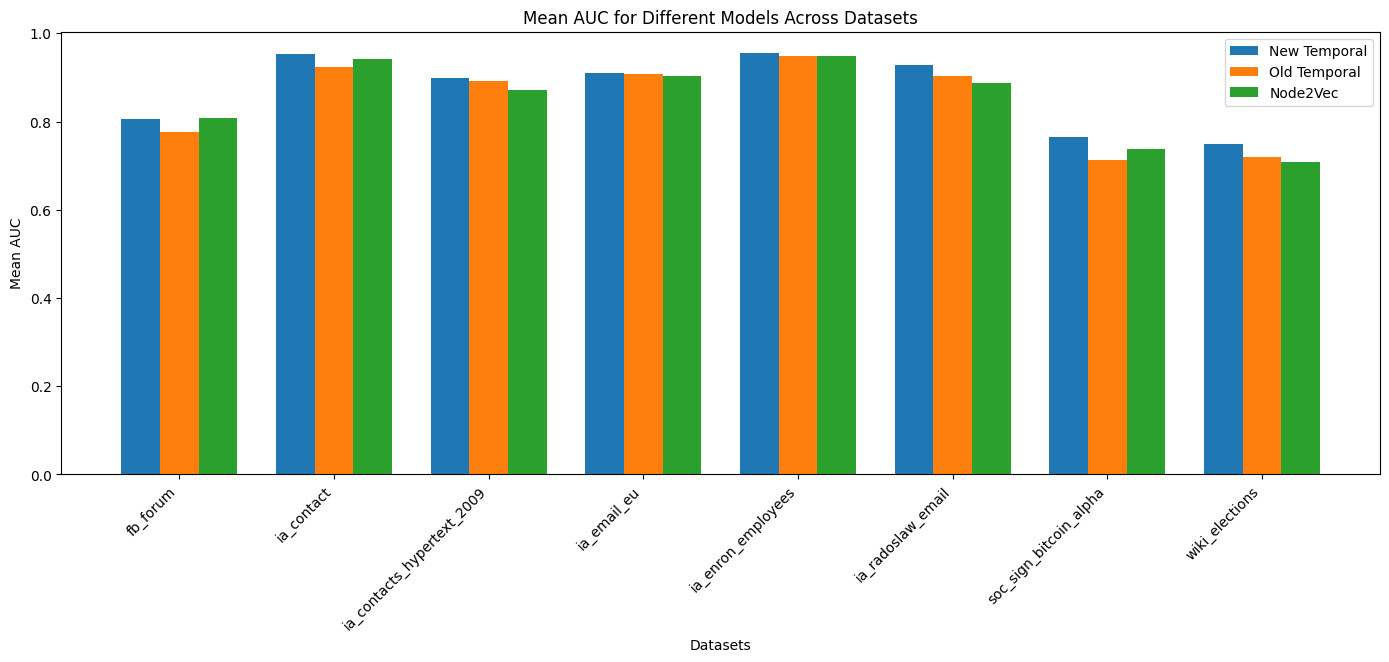

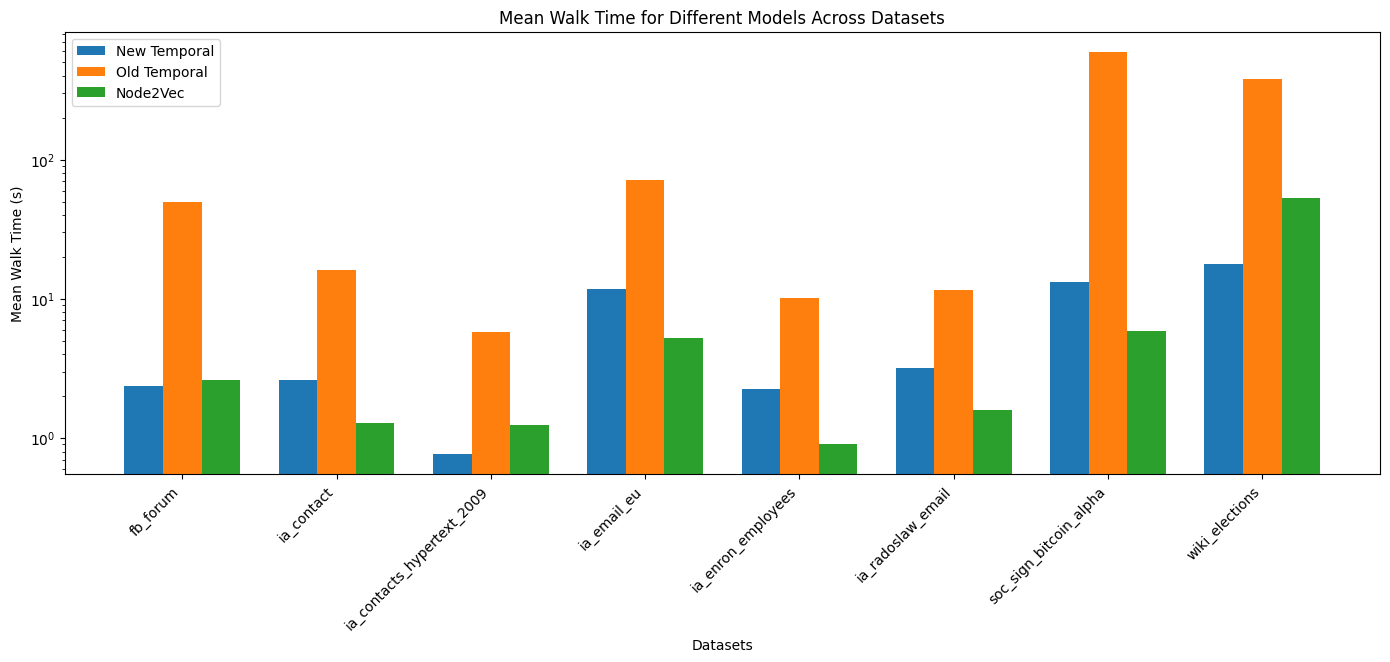

In [7]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.25
dataset_names = [dataset['name'] for dataset in datasets]
x = np.arange(len(datasets))

# Plotting AUC bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, auc_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, auc_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, auc_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean AUC')
plt.title('Mean AUC for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

# Plotting Walk Time bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, walk_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, walk_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, walk_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean Walk Time (s)')
plt.title('Mean Walk Time for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

In [8]:
import pandas as pd

auc_df = pd.DataFrame({
    'Dataset': dataset_names,
    'AUC_New_Temporal': auc_new_temporal,
    'AUC_Old_Temporal': auc_old_temporal,
    'AUC_Node2Vec': auc_node2vec,
})

auc_df = auc_df.round(2)

walk_time_df = pd.DataFrame({
    'Dataset': dataset_names,
    'WalkTime_New_Temporal': walk_new_temporal,
    'WalkTime_Old_Temporal': walk_old_temporal,
    'WalkTime_Node2Vec': walk_node2vec
})

walk_time_df = walk_time_df.round(2)

In [9]:
auc_df

,Dataset,AUC_New_Temporal,AUC_Old_Temporal,AUC_Node2Vec
0,fb_forum,0.81,0.78,0.81
1,ia_contact,0.95,0.92,0.94
2,ia_contacts_hypertext_2009,0.90,0.89,0.87
3,ia_email_eu,0.91,0.91,0.90
4,ia_enron_employees,0.96,0.95,0.95
5,ia_radoslaw_email,0.93,0.90,0.89
6,soc_sign_bitcoin_alpha,0.77,0.71,0.74
7,wiki_elections,0.75,0.72,0.71


In [10]:
walk_time_df

,Dataset,WalkTime_New_Temporal,WalkTime_Old_Temporal,WalkTime_Node2Vec
0,fb_forum,2.37,49.84,2.63
1,ia_contact,2.63,16.25,1.28
2,ia_contacts_hypertext_2009,0.76,5.82,1.24
3,ia_email_eu,11.75,71.39,5.24
4,ia_enron_employees,2.26,10.14,0.90
5,ia_radoslaw_email,3.19,11.66,1.58
6,soc_sign_bitcoin_alpha,13.25,593.56,5.85
7,wiki_elections,17.87,379.71,52.80


In [11]:
edges = pd.read_parquet('data/data_alibaba.parquet')
edges.columns = ["source", "target", "time"]

In [12]:
edges

,source,target,time
0,19204,11617,3600000
1,19204,11617,3600000
2,19032,2545,3600000
3,19032,2545,3600000
4,19204,8115,3600000
...,...,...,...
3216193,966,17973,3779999
3216194,15189,15189,3779999
3216195,7421,15923,3779999
3216196,391,2268,3779999
